

# Hàm Basic

In [35]:
import numpy as np
import pandas as pd

In [36]:
n_times_success = 10

In [37]:
def initialize_population( num_individuals, num_variables):
    pop = np.random.randint(2, size=(int(num_individuals), int(num_variables)))
    return pop

In [38]:
def better_fitness( fitness_1, fitness_2, maximization=True ):
    if maximization:
        if fitness_1 > fitness_2:
            return True
    else:
        if fitness_1 < fitness_2:
            return True
        
    return False

In [39]:
def tournament_selection( pop, pop_fitness, selection_size, tournament_size):
    num_individuals = len(pop)
    indices = np.arange(num_individuals)
    selected_indices = []
    
    while len(selected_indices) < selection_size:
        np.random.shuffle(indices)
        for i in range(0, num_individuals, tournament_size):
          best_idx = i
          for idx in range(1, tournament_size):
            if better_fitness(pop_fitness[indices[i + idx]], pop_fitness[indices[best_idx]]):
              best_idx = i + idx
          selected_indices.append(indices[best_idx])
        np.array(selected_indices)
        
    return selected_indices

In [40]:
def variation_UX( pop ):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)

    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        
        for idx in range(0, num_parameters):
          r = np.random.rand()
          if r < 0.5: 
            temp = offspring2[idx]
            offspring2[idx] = offspring1[idx]
            offspring1[idx] = temp

            

        offspring.append(offspring1)
        offspring.append(offspring2)


    
    offspring = np.array(offspring)
    return offspring

In [41]:
def variation_OneX( pop ):

    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)

    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        
       
        j = np.random.randint(1, num_parameters-1)
        temp = offspring2[j::]
        offspring2[j::] = offspring1[j::]
        offspring1[j::] = temp

            

        offspring.append(offspring1)
        offspring.append(offspring2)

    
    offspring = np.array(offspring)
    return offspring

In [42]:
def check_convergence(pop_fitness):
    if np.any(pop_fitness != pop_fitness[0]): 
      return False
    return True



# OneMax

In [ ]:
def onemax( ind ):
    return np.sum(ind)  

In [ ]:
def evaluate_population( pop ):
    values = np.array([onemax(ind) for ind in pop])
    return values

In [ ]:
def check_onemax(pop_fitness, num_variables):
  for fitness in pop_fitness:
    if fitness != num_variables:
      return False
  return True

In [ ]:
def popop_OneMax(num_individuals, num_parameters, key):

    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = evaluate_population(pop)
    #print("#Gen 0:")
    #print(pop_fitness)
    #first_pop_fitness = pop_fitness
    
    selection_size = len(pop)
    tournament_size = 4

    time_called = 0

    while not check_convergence(pop) and not check_onemax(pop_fitness, num_parameters):

        
        offspring = [] 
        if key == 1: offspring = variation_OneX(pop) # lai 1 diem
        else: offspring = variation_UX(pop) # lai dong nhat
        offspring_fitness = evaluate_population(offspring)
        time_called += len(offspring)
        
        pool = np.vstack((pop,offspring))
        pool_fitness = np.hstack((pop_fitness, offspring_fitness))

        pool_indices = tournament_selection(pool, pool_fitness, selection_size, tournament_size)


        pop = pool[pool_indices, :]
        pop_fitness = pool_fitness[pool_indices]
        #print("#Gen {}:".format(i+1))
        #print(pop_fitness)

    #print("#Result:")
    #print(pop)
    #print(pop_fitness)
    return pop, pop_fitness, time_called

In [ ]:
def isSuccess_OneMax(num_individuals, num_variables, seed, random_seed, key):
  average_call = 0
  for i in range(10):
    seed_ = 1
    if key == 1:
      seed_ = random_seed[i]
    else: 
      seed_ = np.random.randint(seed, seed + 10)
      random_seed.append(seed)

    np.random.seed(seed_)
    #pop, pop_fitness, time_called = popop_OneMax(num_individuals, num_variables,  0) # lai dong nhat
    pop, pop_fitness, time_called = popop_OneMax(num_individuals, num_variables, 1) # lai mot diem
    average_call += time_called
    if  not check_onemax(pop_fitness, num_variables):
      return -1 
  return average_call/10


In [ ]:
def find_upper_OneMax(num_variables, seed, random_seed):
  num_individuals = 4
  average_call = isSuccess_OneMax(num_individuals, num_variables, seed, random_seed, 0)
  while average_call == -1:
    num_individuals *= 2
    average_call = isSuccess_OneMax(num_individuals, num_variables, seed, random_seed, 0)
    if num_individuals > 8192: 
      return [-1, 0]

  print(f'Cần {num_individuals} cá thể để chạy POPOP thành công 10 lần cho {num_variables} biến')
  return [num_individuals, average_call]

In [ ]:
def eval_mrps_OneMax(num_individuals, size, random_seed, seed):
  n_upper, n_lower = num_individuals, num_individuals//2
  average_call = 0
  while (n_upper - n_lower) / n_upper > 0.1:
    n = (n_upper + n_lower) // 2
    if n % 2 != 0: n += 1
    x = isSuccess_OneMax(n, size, seed, random_seed, 1)
    if x != -1:
      n_upper = n
      average_call = x
    else:
      n_lower = n
    if n_upper - n_lower <= 2: break

  print(f'{n_lower} <= x <= {n_upper}')
  return n_upper, average_call

In [ ]:
problem_size = [10, 20, 40, 80, 160]
MRPS = []
data_random_seed = []
ave_eval = []
for i in range(10):
  seed = 19520197 + i*10
  print(f'Lần {i + 1}')
  print("-"*15)
  for size in problem_size:
    random_seed = []
    x = find_upper_OneMax(size, seed, random_seed)
    num_individuals, average_call = x[0], x[1]
    if num_individuals == -1: 
      n_times_success -= 1
      break
    mrps, average_eval = eval_mrps_OneMax(int(num_individuals), size, random_seed, seed)
    #if mrps != -1:
    if mrps != 0 and mrps != -1 and mrps != num_individuals:
      MRPS.append(mrps)
      ave_eval.append(average_eval)
    else:
      MRPS.append(num_individuals)
      ave_eval.append(average_call)
  print(ave_eval[5*i: 5*i + 5])
    
  print("-"*15)
print("MRPS   Ave_call")
for i in range(len(MRPS)):
  print(MRPS[i],"  ", ave_eval[i])

Lần 1
---------------
Cần 16 cá thể để chạy POPOP thành công 10 lần cho 10 biến
12 <= x <= 14
Cần 64 cá thể để chạy POPOP thành công 10 lần cho 20 biến
32 <= x <= 34
Cần 256 cá thể để chạy POPOP thành công 10 lần cho 40 biến
192 <= x <= 208
Cần 512 cá thể để chạy POPOP thành công 10 lần cho 80 biến
352 <= x <= 384
Cần 4096 cá thể để chạy POPOP thành công 10 lần cho 160 biến
2048 <= x <= 2176
[98.0, 408.0, 3328.0, 10368.0, 84864.0]
---------------
Lần 2
---------------
Cần 32 cá thể để chạy POPOP thành công 10 lần cho 10 biến
16 <= x <= 18
Cần 64 cá thể để chạy POPOP thành công 10 lần cho 20 biến
32 <= x <= 34
Cần 128 cá thể để chạy POPOP thành công 10 lần cho 40 biến
88 <= x <= 96
Cần 512 cá thể để chạy POPOP thành công 10 lần cho 80 biến
416 <= x <= 448
Cần 2048 cá thể để chạy POPOP thành công 10 lần cho 160 biến
1536 <= x <= 1664
[90.0, 272.0, 1728.0, 11648.0, 68224.0]
---------------
Lần 3
---------------
Cần 8 cá thể để chạy POPOP thành công 10 lần cho 10 biến
6 <= x <= 8
Cần 32 cá

# Tính (Mean của (MRPS và Evaluations) ) cho OneX_OneMax

In [ ]:
seed_arr = [19520197 +i*10 for i in range(10)]

In [ ]:
data_MRPS_OneX_OneMax = MRPS
data_averageCall_OneX_OneMax = ave_eval

In [ ]:
print("OneX OneMax")
print("MRPS   Ave_call")
for i in range(len(data_MRPS_OneX_OneMax)):
  print(data_MRPS_OneX_OneMax[i],"  ", data_averageCall_OneX_OneMax[i])

OneX OneMax
MRPS   Ave_call
14    98.0
34    408.0
208    3328.0
384    10368.0
2176    84864.0
18    90.0
34    272.0
96    1728.0
448    11648.0
1664    68224.0
8    75.2
24    456.0
208    3536.0
352    8800.0
1536    62976.0
14    126.0
56    728.0
176    2992.0
288    8064.0
2176    93568.0
10    70.0
34    340.0
136    2312.0
544    14688.0
2176    80512.0
12    84.0
48    576.0
112    1904.0
416    11648.0
1536    66048.0
22    132.0
44    484.0
96    2016.0
544    13600.0
2176    100096.0
22    176.0
52    468.0
224    3360.0
544    15776.0
2560    104960.0
18    144.0
34    374.0
136    2176.0
320    8320.0
2304    78336.0
18    108.0
36    324.0
136    2448.0
288    8064.0
2816    109824.0


In [ ]:
MRPS_OneX_OneMax = np.array(data_MRPS_OneX_OneMax).reshape((-1, 5))
Eval_OneX_OneMax = np.array(data_averageCall_OneX_OneMax).reshape((-1, 5))
Mean_MRPS_OneX_OneMax = np.average(MRPS_OneX_OneMax, axis = 0)
Mean_Eval_OneX_OneMax = np.average(Eval_OneX_OneMax, axis = 0)

In [ ]:
print(MRPS_OneX_OneMax)
print(Mean_MRPS_OneX_OneMax)
print(Eval_OneX_OneMax)
print(Mean_Eval_OneX_OneMax)

[[  14   34  208  384 2176]
 [  18   34   96  448 1664]
 [   8   24  208  352 1536]
 [  14   56  176  288 2176]
 [  10   34  136  544 2176]
 [  12   48  112  416 1536]
 [  22   44   96  544 2176]
 [  22   52  224  544 2560]
 [  18   34  136  320 2304]
 [  18   36  136  288 2816]]
[  15.6   39.6  152.8  412.8 2112. ]
[[9.80000e+01 4.08000e+02 3.32800e+03 1.03680e+04 8.48640e+04]
 [9.00000e+01 2.72000e+02 1.72800e+03 1.16480e+04 6.82240e+04]
 [7.52000e+01 4.56000e+02 3.53600e+03 8.80000e+03 6.29760e+04]
 [1.26000e+02 7.28000e+02 2.99200e+03 8.06400e+03 9.35680e+04]
 [7.00000e+01 3.40000e+02 2.31200e+03 1.46880e+04 8.05120e+04]
 [8.40000e+01 5.76000e+02 1.90400e+03 1.16480e+04 6.60480e+04]
 [1.32000e+02 4.84000e+02 2.01600e+03 1.36000e+04 1.00096e+05]
 [1.76000e+02 4.68000e+02 3.36000e+03 1.57760e+04 1.04960e+05]
 [1.44000e+02 3.74000e+02 2.17600e+03 8.32000e+03 7.83360e+04]
 [1.08000e+02 3.24000e+02 2.44800e+03 8.06400e+03 1.09824e+05]]
[  110.32   443.    2580.   11097.6  84940.8 ]


In [ ]:
std_MRPS_OneX_OneMax = np.subtract(MRPS_OneX_OneMax, Mean_MRPS_OneX_OneMax)
std_MRPS_OneX_OneMax = np.square(std_MRPS_OneX_OneMax)
std_MRPS_OneX_OneMax = np.sum(std_MRPS_OneX_OneMax, axis = 0)
std_MRPS_OneX_OneMax = np.divide(std_MRPS_OneX_OneMax, problem_size)
std_MRPS_OneX_OneMax = np.sqrt(std_MRPS_OneX_OneMax)
print(std_MRPS_OneX_OneMax)

std_Eval_OneX_OneMax = np.subtract(Eval_OneX_OneMax, Mean_Eval_OneX_OneMax)
std_Eval_OneX_OneMax = np.square(std_Eval_OneX_OneMax)
std_Eval_OneX_OneMax = np.sum(std_Eval_OneX_OneMax, axis = 0)
std_Eval_OneX_OneMax = np.divide(std_Eval_OneX_OneMax, problem_size)
std_Eval_OneX_OneMax = np.sqrt(std_Eval_OneX_OneMax)
print(std_Eval_OneX_OneMax)

[  4.54312668   6.6873014   22.72971623  34.85283346 100.43107089]
[  32.07181941   89.82928253  316.42629474  959.02350336 3957.69500593]


In [ ]:
OneX_OneMax_data = np.hstack((np.array(seed_arr).reshape(-1, 1), MRPS_OneX_OneMax, Eval_OneX_OneMax))
OneX_OneMax_data = np.vstack((OneX_OneMax_data, np.hstack((["Mean"], Mean_MRPS_OneX_OneMax , Mean_Eval_OneX_OneMax))))
OneX_OneMax_data = np.vstack((OneX_OneMax_data, np.hstack((["Std"], std_MRPS_OneX_OneMax, std_Eval_OneX_OneMax))))
OneX_OneMax_data = pd.DataFrame(OneX_OneMax_data, columns=['Start seed number', 'MRPS 10', 'MRPS 20', 'MRPS 40', 'MRPS 80', 'MRPS 160', 'Eva 10', 'Eva 20', 'Eva 40', 'Eva 80', 'Eva 160'])

In [ ]:
OneX_OneMax_data
OneX_OneMax_data.to_csv("OneX_OneMax_data.csv")

# Tính (Mean của (MRPS và Evaluations) ) cho UX_OneMax

In [ ]:
seed_arr = [19520197 +i*10 for i in range(10)]

In [ ]:
data_MRPS_UX_OneMax = MRPS
data_averageCall_UX_OneMax = ave_eval

In [ ]:
print("UX OneMax")
print("MRPS   Ave_call")
for i in range(len(data_MRPS_UX_OneMax)):
  print(data_MRPS_UX_OneMax[i],"  ", data_averageCall_UX_OneMax[i])

UX OneMax
MRPS   Ave_call
10    60.0
16    128.0
24    312.0
68    1292.0
136    3672.0
10    50.0
16    128.0
24    360.0
80    1600.0
88    2552.0
16    144.0
14    126.0
34    476.0
48    1008.0
96    3072.0
14    84.0
26    338.0
44    616.0
72    1440.0
128    3840.0
10    80.0
18    198.0
36    576.0
68    1360.0
136    3808.0
10    70.0
28    308.0
44    660.0
96    1824.0
96    2880.0
16    89.6
18    144.0
40    520.0
68    1360.0
136    3808.0
14    70.0
28    252.0
40    600.0
80    1520.0
88    2640.0
18    144.0
18    180.0
52    676.0
68    1360.0
104    3120.0
18    72.0
22    198.0
52    780.0
80    1600.0
136    3944.0


In [ ]:
MRPS_UX_OneMax = np.array(data_MRPS_UX_OneMax).reshape((-1, 5))
Eval_UX_OneMax = np.array(data_averageCall_UX_OneMax).reshape((-1, 5))
Mean_MRPS_UX_OneMax = np.average(MRPS_UX_OneMax, axis = 0)
Mean_Eval_UX_OneMax = np.average(Eval_UX_OneMax, axis = 0)

In [ ]:
print(MRPS_UX_OneMax)
print(Mean_MRPS_UX_OneMax)
print(Eval_UX_OneMax)
print(Mean_Eval_UX_OneMax)

[[ 10  16  24  68 136]
 [ 10  16  24  80  88]
 [ 16  14  34  48  96]
 [ 14  26  44  72 128]
 [ 10  18  36  68 136]
 [ 10  28  44  96  96]
 [ 16  18  40  68 136]
 [ 14  28  40  80  88]
 [ 18  18  52  68 104]
 [ 18  22  52  80 136]]
[ 13.6  20.4  39.   72.8 114.4]
[[  60.   128.   312.  1292.  3672. ]
 [  50.   128.   360.  1600.  2552. ]
 [ 144.   126.   476.  1008.  3072. ]
 [  84.   338.   616.  1440.  3840. ]
 [  80.   198.   576.  1360.  3808. ]
 [  70.   308.   660.  1824.  2880. ]
 [  89.6  144.   520.  1360.  3808. ]
 [  70.   252.   600.  1520.  2640. ]
 [ 144.   180.   676.  1360.  3120. ]
 [  72.   198.   780.  1600.  3944. ]]
[  86.36  200.    557.6  1436.4  3333.6 ]


In [ ]:
std_MRPS_UX_OneMax = np.subtract(MRPS_UX_OneMax, Mean_MRPS_UX_OneMax)
std_MRPS_UX_OneMax = np.square(std_MRPS_UX_OneMax)
std_MRPS_UX_OneMax = np.sum(std_MRPS_UX_OneMax, axis = 0)
std_MRPS_UX_OneMax = np.divide(std_MRPS_UX_OneMax, problem_size)
std_MRPS_UX_OneMax = np.sqrt(std_MRPS_UX_OneMax)
print(std_MRPS_UX_OneMax)

std_Eval_UX_OneMax = np.subtract(Eval_UX_OneMax, Mean_Eval_UX_OneMax)
std_Eval_UX_OneMax = np.square(std_Eval_UX_OneMax)
std_Eval_UX_OneMax = np.sum(std_Eval_UX_OneMax, axis = 0)
std_Eval_UX_OneMax = np.divide(std_Eval_UX_OneMax, problem_size)
std_Eval_UX_OneMax = np.sqrt(std_Eval_UX_OneMax)
print(std_Eval_UX_OneMax)

[3.2        3.50998575 4.67439836 4.18568991 5.14198405]
[ 30.75656678  51.38093031  68.36490328  73.54032907 127.60893386]


In [ ]:
UX_OneMax_data = np.hstack((np.array(seed_arr).reshape(-1, 1), MRPS_UX_OneMax, Eval_UX_OneMax))
UX_OneMax_data = np.vstack((UX_OneMax_data, np.hstack((["Mean"], Mean_MRPS_UX_OneMax , Mean_Eval_UX_OneMax))))
UX_OneMax_data = np.vstack((UX_OneMax_data, np.hstack((["Std"], std_MRPS_UX_OneMax, std_Eval_UX_OneMax))))
UX_OneMax_data = pd.DataFrame(UX_OneMax_data, columns=['Start seed number', 'MRPS 10', 'MRPS 20', 'MRPS 40', 'MRPS 80', 'MRPS 160', 'Eva 10', 'Eva 20', 'Eva 40', 'Eva 80', 'Eva 160'])

In [ ]:
UX_OneMax_data
UX_OneMax_data.to_csv("UX_OneMax_data.csv")

# Lưu Table OneMax 

In [15]:
temp = pd.read_csv("OneX_OneMax_data.csv")
name = [i for i in temp]
name = name[2::]
name

['MRPS 10',
 'MRPS 20',
 'MRPS 40',
 'MRPS 80',
 'MRPS 160',
 'Eva 10',
 'Eva 20',
 'Eva 40',
 'Eva 80',
 'Eva 160']

In [16]:
data_1X_Mean_Mrps_OneMax = []
data_1X_std_Mrps_OneMax = []
data_1X_Mean_Eval_OneMax = []
data_1X_std_Eval_OneMax = []

In [17]:
# lấy data cho Mean MRPS 1X OneMax
i = 10
for _ in range(5):
  x = []
  for j in temp[f"MRPS {i}"]:
    x.append(j)
  data_1X_Mean_Mrps_OneMax.append(x[10])
  data_1X_std_Mrps_OneMax.append(round(x[11],2))
  i = i * 2 
np.array(data_1X_Mean_Mrps_OneMax)
np.array(data_1X_std_Mrps_OneMax)
print(data_1X_Mean_Mrps_OneMax)
print(data_1X_std_Mrps_OneMax)


[15.6, 39.6, 152.8, 412.8, 2112.0]
[4.5431266766402185, 6.687301398920195, 22.7297162322806, 34.852833457267145, 100.43107088944136]


In [19]:
# lấy data cho Mean Eval 1X OneMax
i = 10
for _ in range(5):
  x = []
  for j in temp[f"Eva {i}"]:
    x.append(j)
  data_1X_Mean_Eval_OneMax.append(x[10])
  data_1X_std_Eval_OneMax.append(round(x[11], 2))
  i = i * 2 
np.array(data_1X_Mean_Eval_OneMax)
np.array(data_1X_std_Eval_OneMax)
print(data_1X_Mean_Eval_OneMax)
print(data_1X_std_Eval_OneMax)


[110.32, 443.0, 2580.0, 11097.6, 84940.8]
[32.07181940582729, 89.82928253080952, 316.42629473544065, 959.0235033616226, 3957.695005934642]


In [20]:
temp_ = pd.read_csv("UX_OneMax_data.csv")
name_ = [i for i in temp_]
name_ = name_[2::]
name_

['MRPS 10',
 'MRPS 20',
 'MRPS 40',
 'MRPS 80',
 'MRPS 160',
 'Eva 10',
 'Eva 20',
 'Eva 40',
 'Eva 80',
 'Eva 160']

In [21]:
data_UX_Mean_Mrps_OneMax = []
data_UX_std_Mrps_OneMax = []
data_UX_Mean_Eval_OneMax = []
data_UX_std_Eval_OneMax = []

In [22]:
# lấy data cho Mean MRPS UX OneMax
i = 10
for _ in range(5):
  x = []
  for j in temp_[f"MRPS {i}"]:
    x.append(j)
  data_UX_Mean_Mrps_OneMax.append(x[10])
  data_UX_std_Mrps_OneMax.append(x[11])
  i = i * 2 
np.array(data_UX_Mean_Mrps_OneMax)
np.array(data_UX_std_Mrps_OneMax)
print(data_UX_Mean_Mrps_OneMax)
print(data_UX_std_Mrps_OneMax)


[13.6, 20.4, 39.0, 72.8, 114.4]
[3.2, 3.5099857549568485, 4.674398357008098, 4.185689907291271, 5.141984052872977]


In [23]:
# lấy data cho Mean Eval UX OneMax
i = 10
for _ in range(5):
  x = []
  for j in temp_[f"Eva {i}"]:
    x.append(j)
  data_UX_Mean_Eval_OneMax.append(x[10])
  data_UX_std_Eval_OneMax.append(x[11])
  i = i * 2 
np.array(data_UX_Mean_Eval_OneMax)
np.array(data_UX_std_Eval_OneMax)
print(data_UX_Mean_Eval_OneMax)
print(data_UX_std_Eval_OneMax)

[86.36, 200.0, 557.6, 1436.4, 3333.6]
[30.75656677849464, 51.38093031466052, 68.36490327646196, 73.54032907187728, 127.608933856529]


In [55]:
_data_MRPS_std_OX_OneMax = []
_data_Eval_std_OX_OneMax = []
_data_MRPS_std_UX_OneMax = []
_data_Eval_std_UX_OneMax = []

In [56]:
# combine dữ liệu cho OX OneMax
for i in range(5):
  _data_MRPS_std_OX_OneMax.append(f"{str(data_1X_Mean_Mrps_OneMax[i])} ({str(data_1X_std_Mrps_OneMax[i])})")
  _data_Eval_std_OX_OneMax.append(f"{str(data_1X_Mean_Eval_OneMax[i])} ({str(data_1X_std_Eval_OneMax[i])})")


In [57]:
data_MRPS_std_OX_OneMax = np.array(_data_MRPS_std_OX_OneMax)
data_Eval_std_OX_OneMax = np.array(_data_Eval_std_OX_OneMax)
print(data_MRPS_std_OX_OneMax)
print(data_Eval_std_OX_OneMax)

['15.6 (4.5431266766402185)' '39.6 (6.687301398920195)'
 '152.8 (22.7297162322806)' '412.8 (34.852833457267145)'
 '2112.0 (100.43107088944136)']
['110.32 (32.07181940582729)' '443.0 (89.82928253080952)'
 '2580.0 (316.42629473544065)' '11097.6 (959.0235033616226)'
 '84940.8 (3957.695005934642)']


In [58]:
# combine dữ liệu cho UX OneMax
for i in range(5):
  _data_MRPS_std_UX_OneMax.append(f"{str(data_UX_Mean_Mrps_OneMax[i])} ({str(data_UX_std_Mrps_OneMax[i])})")
  _data_Eval_std_UX_OneMax.append(f"{str(data_UX_Mean_Eval_OneMax[i])} ({str(data_UX_std_Eval_OneMax[i])})")


In [59]:
data_MRPS_std_UX_OneMax = np.array(_data_MRPS_std_UX_OneMax)
data_Eval_std_UX_OneMax = np.array(_data_Eval_std_UX_OneMax)
print(data_MRPS_std_UX_OneMax)
print(data_Eval_std_UX_OneMax)

['13.6 (3.2)' '20.4 (3.5099857549568485)' '39.0 (4.674398357008098)'
 '72.8 (4.185689907291271)' '114.4 (5.141984052872977)']
['86.36 (30.75656677849464)' '200.0 (51.38093031466052)'
 '557.6 (68.36490327646196)' '1436.4 (73.54032907187728)'
 '3333.6 (127.608933856529)']


In [60]:
col = ['10', '20', '40', '80', '160']
data = np.hstack((np.array(col).reshape(-1,1), data_MRPS_std_OX_OneMax.reshape(-1, 1), data_Eval_std_OX_OneMax.reshape(-1,1), data_MRPS_std_UX_OneMax.reshape(-1,1), data_Eval_std_UX_OneMax.reshape(-1,1)))
data = pd.DataFrame(data, columns=['Problem size', '1X MRPS', '1X Evaluation Call', 'UX MRPS', 'UX Evaluation Call'])
data
data.to_csv("Onemax_data.csv")

# Trap 5

In [72]:
def concatenated_trap_k(ind, k):
  fitness = 0
  for i in range(0, len(ind), k):
    u = 0
    for j in range(0, k):
      u += ind[i+j]
    if u == k:
      fitness += k
    else:
      fitness += (k-1-u)
  return fitness 

In [73]:
def evaluate_population_trap5( pop ):
    
    values = np.array([concatenated_trap_k(ind, 5) for ind in pop])
    
    return values

In [74]:
def check_trap5(pop_fitness, num_variables):
  for fitness in pop_fitness:
    if fitness != num_variables:
      return False
  return True

In [75]:
def popop_trap5(num_individuals, num_parameters, key):

    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = evaluate_population_trap5(pop)
    #print("#Gen 0:")
    #print(pop_fitness)
    #first_pop_fitness = pop_fitness
    
    selection_size = len(pop)
    tournament_size = 4

    time_called = 0

    while not check_convergence(pop) and not check_trap5(pop_fitness, num_parameters):
  
        offspring = [] 
        if key == 1: offspring = variation_OneX(pop) # lai 1 diem
        else: offspring = variation_UX(pop) # lai dong nhat
        offspring_fitness = evaluate_population_trap5(offspring)
        time_called += (len(offspring) * len(offspring[0]) // 5)
        
        pool = np.vstack((pop,offspring))
        pool_fitness = np.hstack((pop_fitness, offspring_fitness))

     
        pool_indices = tournament_selection(pool, pool_fitness, selection_size, tournament_size)

      
        pop = pool[pool_indices, :]
        pop_fitness = pool_fitness[pool_indices]
        #print("#Gen {}:".format(i+1))
        #print(pop_fitness)

    #print("#Result:")
    #print(pop)
    #print(pop_fitness)
    return pop, pop_fitness, time_called

In [76]:
def isSuccess_trap5(num_individuals, num_variables, seed, random_seed, key):
  average_call = 0
  for i in range(10):
    seed_ = 1
    if key == 1:
      seed_ = random_seed[i]
    else: 
      seed_ = np.random.randint(seed, seed + 10)
      random_seed.append(seed)

    np.random.seed(seed_)
    #pop, pop_fitness, time_called = popop_trap5(num_individuals, num_variables,  0) # lai dong nhat
    pop, pop_fitness, time_called = popop_trap5(num_individuals, num_variables, 1) # lai mot diem
    average_call += time_called
    if  not check_trap5(pop_fitness, num_variables):
      return -1 
  return average_call/10

In [77]:
def find_upper_trap5(num_variables, seed, random_seed):
  num_individuals = 4
  average_call = isSuccess_trap5(num_individuals, num_variables, seed, random_seed, 0)
  while average_call == -1:
    num_individuals *= 2
    average_call = isSuccess_trap5(num_individuals, num_variables, seed, random_seed, 0)
    if num_individuals > 8192: 
      return [-1, 0]

  print(f'Cần {num_individuals} cá thể để chạy POPOP thành công 10 lần cho {num_variables} biến')
  return [num_individuals, average_call+10]

In [78]:
def eval_mrps_trap5(num_individuals, size, random_seed, seed):
  n_upper, n_lower = num_individuals, num_individuals//2
  average_call = 0
  while (n_upper - n_lower) / n_upper > 0.1:
    n = (n_upper + n_lower) // 2
    if n % 2 != 0: n+=1 
    x = isSuccess_trap5(n, size, seed, random_seed, 1)
    if x != -1:
      n_upper = n
      average_call = x
    else:
      n_lower = n
    if n_upper - n_lower <= 2: break

  print(f'{n_lower} <= x <= {n_upper}')
  return n_upper, average_call

In [112]:
problem_size = [10, 20, 40, 80, 160]

In [79]:

MRPS_trap5 = []
data_random_seed = []
ave_eval = []
for i in range(10):
  seed = 19520197 + i*10
  print(f'Lần {i + 1}')
  print("-"*15)
  for size in problem_size:
    random_seed = []
    x = find_upper_trap5(size, seed, random_seed)
    num_individuals, average_call = x[0], x[1]
    if num_individuals == -1: 
      n_times_success -= 1
      break
    mrps, average_eval = eval_mrps_trap5(int(num_individuals), size, random_seed, seed)
    if mrps != 0 and mrps != -1 and mrps != num_individuals:
      MRPS_trap5.append(mrps)
      ave_eval.append(average_eval)
    else:
      MRPS_trap5.append(num_individuals)
      ave_eval.append(average_call)

    
  #print(MRPS_trap5[5*i: 5*i + 5])
  print("-"*15)
print("MRPS   Ave_call")
for i in range(len(MRPS_trap5)):
  print(MRPS_trap5[i],"  ", ave_eval[i])

Lần 1
---------------
Cần 512 cá thể để chạy POPOP thành công 10 lần cho 40 biến
384 <= x <= 416
Cần 2048 cá thể để chạy POPOP thành công 10 lần cho 80 biến
1152 <= x <= 1280
---------------
Lần 2
---------------
Cần 1024 cá thể để chạy POPOP thành công 10 lần cho 40 biến
512 <= x <= 544
Cần 4096 cá thể để chạy POPOP thành công 10 lần cho 80 biến
2048 <= x <= 2176
---------------
Lần 3
---------------
Cần 256 cá thể để chạy POPOP thành công 10 lần cho 40 biến
240 <= x <= 256
Cần 1024 cá thể để chạy POPOP thành công 10 lần cho 80 biến
896 <= x <= 960
---------------
Lần 4
---------------
Cần 512 cá thể để chạy POPOP thành công 10 lần cho 40 biến
384 <= x <= 416
Cần 2048 cá thể để chạy POPOP thành công 10 lần cho 80 biến
1024 <= x <= 1088
---------------
Lần 5
---------------
Cần 1024 cá thể để chạy POPOP thành công 10 lần cho 40 biến
768 <= x <= 832
Cần 4096 cá thể để chạy POPOP thành công 10 lần cho 80 biến
2560 <= x <= 2816
---------------
Lần 6
---------------
Cần 1024 cá thể để chạy

# Tính (Mean của (MRPS và Evaluations) ) cho UX_trap5

In [ ]:
seed_arr = [19520197 +i*10 for i in range(10)]

In [ ]:
data_MRPS_UX_trap5 = MRPS_trap5
data_averageCall_UX_trap5 = ave_eval

In [ ]:
print("OneX TRAP 5")
print("MRPS   Ave_call")
for i in range(len(data_MRPS_UX_trap5)):
  print(data_MRPS_UX_trap5[i],"  ", data_averageCall_UX_trap5[i])

OneX TRAP 5
MRPS   Ave_call
136    2448.0
1152    124416.0
68    952.0
1408    180224.0
176    3872.0
2176    174080.0
160    4480.0
256    22538.0
176    2464.0
2560    215040.0
136    2176.0
1536    129024.0
68    952.0
2176    191488.0
144    2880.0
1280    92160.0
136    2448.0
1280    128000.0
272    4896.0
2176    208896.0


In [ ]:
MRPS_UX_trap5 = np.array(data_MRPS_UX_trap5).reshape((-1, 2))
Eval_UX_trap5 = np.array(data_averageCall_UX_trap5).reshape((-1, 2))
Mean_MRPS_UX_trap5 = np.average(MRPS_UX_trap5, axis = 0)
Mean_Eval_UX_trap5 = np.average(Eval_UX_trap5, axis = 0)

In [ ]:
print(MRPS_UX_trap5)
print(Mean_MRPS_UX_trap5)
print(Eval_UX_trap5)
print(Mean_Eval_UX_trap5)

[[ 136 1152]
 [  68 1408]
 [ 176 2176]
 [ 160  256]
 [ 176 2560]
 [ 136 1536]
 [  68 2176]
 [ 144 1280]
 [ 136 1280]
 [ 272 2176]]
[ 147.2 1600. ]
[[  2448. 124416.]
 [   952. 180224.]
 [  3872. 174080.]
 [  4480.  22538.]
 [  2464. 215040.]
 [  2176. 129024.]
 [   952. 191488.]
 [  2880.  92160.]
 [  2448. 128000.]
 [  4896. 208896.]]
[  2756.8 146586.6]


In [ ]:
std_MRPS_UX_trap5 = np.subtract(MRPS_UX_trap5, Mean_MRPS_UX_trap5)
std_MRPS_UX_trap5 = np.square(std_MRPS_UX_trap5)
std_MRPS_UX_trap5 = np.sum(std_MRPS_UX_trap5, axis = 0)
std_MRPS_UX_trap5 = np.divide(std_MRPS_UX_trap5, problem_size[0:2])
std_MRPS_UX_trap5 = np.sqrt(std_MRPS_UX_trap5)
print(std_MRPS_UX_trap5)

std_Eval_UX_trap5 = np.subtract(Eval_UX_trap5, Mean_Eval_UX_trap5)
std_Eval_UX_trap5 = np.square(std_Eval_UX_trap5)
std_Eval_UX_trap5 = np.sum(std_Eval_UX_trap5, axis = 0)
std_Eval_UX_trap5 = np.divide(std_Eval_UX_trap5, problem_size[0:2])
std_Eval_UX_trap5 = np.sqrt(std_Eval_UX_trap5)
print(std_Eval_UX_trap5)

[ 55.07231609 456.60310993]
[ 1262.25296989 39979.73162516]


In [ ]:
UX_trap5_data = np.hstack((np.array(seed_arr).reshape(-1, 1), MRPS_UX_trap5, Eval_UX_trap5))
UX_trap5_data = np.vstack((UX_trap5_data, np.hstack((["Mean"], Mean_MRPS_UX_trap5 , Mean_Eval_UX_trap5))))
UX_trap5_data = np.vstack((UX_trap5_data, np.hstack((["Std"], std_MRPS_UX_trap5, std_Eval_UX_trap5))))
UX_trap5_data = pd.DataFrame(UX_trap5_data, columns=['Start seed number', 'MRPS 10', 'MRPS 20', 'Eva 10', 'Eva 20'])

In [ ]:
UX_trap5_data
UX_trap5_data.to_csv("UX_trap5_data.csv")

# Tính (Mean của (MRPS và Evaluations) ) cho OneX_trap5

In [70]:
seed_arr = [19520197 +i*10 for i in range(10)]

In [94]:
_dt_MRPS_OX_trap5 = []
_dt_Eval_OX_trap5 = []

In [95]:
csvFile = pandas.read_csv('OneX_trap5_data.csv')
# displaying the contents of the CSV file

In [96]:
temp_data_MRPS = []
temp_data_Eval = []
n = 10
for _ in range(2):
  x = []
  for t in csvFile[f"MRPS {n}"]:
    x.append(t)
  for j in range(10):
    temp_data_MRPS.append(x[j])
  x = []
  for y in csvFile[f"Eva {n}"]:
    x.append(y)
  for j in range(10):
    temp_data_Eval.append(x[j])
  n *= 2

In [97]:
for i in range(len(temp_data_MRPS)-10):
  _dt_MRPS_OX_trap5.append(temp_data_MRPS[i])
  _dt_MRPS_OX_trap5.append(temp_data_MRPS[i+10])
  _dt_Eval_OX_trap5.append(temp_data_Eval[i])
  _dt_Eval_OX_trap5.append(temp_data_Eval[i+10])

In [98]:
print(_dt_MRPS_OX_trap5)
print(_dt_Eval_OX_trap5)

[52.0, 120.0, 4.0, 136.0, 68.0, 160.0, 64.0, 136.0, 34.0, 136.0, 136.0, 144.0, 68.0, 68.0, 28.0, 176.0, 68.0, 160.0, 68.0, 160.0]
[728.0, 5280.0, 34.0, 6528.0, 1224.0, 9600.0, 982.8, 6528.0, 408.0, 6528.0, 1904.0, 6912.0, 816.0, 2176.0, 448.0, 10560.0, 952.0, 6400.0, 952.0, 7040.0]


In [106]:
MRPS_trap5_ = []
ave_eval_ = []

In [107]:
for i in range(0,20, 2):
  MRPS_trap5_.append(_dt_MRPS_OX_trap5[i])
  MRPS_trap5_.append(_dt_MRPS_OX_trap5[i+1])
  MRPS_trap5_.append(MRPS_trap5[i])
  MRPS_trap5_.append(MRPS_trap5[i+1])
  ave_eval_.append(_dt_Eval_OX_trap5[i])
  ave_eval_.append(_dt_Eval_OX_trap5[i+1])
  ave_eval_.append(ave_eval[i])
  ave_eval_.append(ave_eval[i+1])


In [108]:
print(MRPS_trap5_)
print(ave_eval_)



[52.0, 120.0, 416, 1280, 4.0, 136.0, 544, 2176, 68.0, 160.0, 256, 960, 64.0, 136.0, 416, 1088, 34.0, 136.0, 832, 2816, 136.0, 144.0, 576, 1792, 68.0, 68.0, 704, 2176, 28.0, 176.0, 544, 1152, 68.0, 160.0, 544, 2816, 68.0, 160.0, 640, 2304]
[728.0, 5280.0, 59904.0, 655360.0, 34.0, 6528.0, 95744.0, 1009664.0, 1224.0, 9600.0, 36874.0, 445440.0, 982.8, 6528.0, 66560.0, 557056.0, 408.0, 6528.0, 106496.0, 1261568.0, 1904.0, 6912.0, 101376.0, 831488.0, 816.0, 2176.0, 107008.0, 1009664.0, 448.0, 10560.0, 65280.0, 423936.0, 952.0, 6400.0, 91392.0, 1216512.0, 952.0, 7040.0, 81920.0, 1142784.0]


In [110]:
data_MRPS_OneX_trap5 = MRPS_trap5_
data_averageCall_OneX_trap5 = ave_eval_

In [111]:
print("OneX TRAP 5")
print("MRPS   Ave_call")
for i in range(len(data_MRPS_OneX_trap5)):
  print(data_MRPS_OneX_trap5[i],"  ", data_averageCall_OneX_trap5[i])

OneX TRAP 5
MRPS   Ave_call
52.0    728.0
120.0    5280.0
416    59904.0
1280    655360.0
4.0    34.0
136.0    6528.0
544    95744.0
2176    1009664.0
68.0    1224.0
160.0    9600.0
256    36874.0
960    445440.0
64.0    982.8
136.0    6528.0
416    66560.0
1088    557056.0
34.0    408.0
136.0    6528.0
832    106496.0
2816    1261568.0
136.0    1904.0
144.0    6912.0
576    101376.0
1792    831488.0
68.0    816.0
68.0    2176.0
704    107008.0
2176    1009664.0
28.0    448.0
176.0    10560.0
544    65280.0
1152    423936.0
68.0    952.0
160.0    6400.0
544    91392.0
2816    1216512.0
68.0    952.0
160.0    7040.0
640    81920.0
2304    1142784.0


In [113]:
MRPS_OneX_trap5 = np.array(data_MRPS_OneX_trap5).reshape((-1, 4))
Eval_OneX_trap5 = np.array(data_averageCall_OneX_trap5).reshape((-1, 4))
Mean_MRPS_OneX_trap5 = np.average(MRPS_OneX_trap5, axis = 0)
Mean_Eval_OneX_trap5 = np.average(Eval_OneX_trap5, axis = 0)

In [114]:
print(MRPS_OneX_trap5)
print(Mean_MRPS_OneX_trap5)
print(Eval_OneX_trap5)
print(Mean_Eval_OneX_trap5)

[[  52.  120.  416. 1280.]
 [   4.  136.  544. 2176.]
 [  68.  160.  256.  960.]
 [  64.  136.  416. 1088.]
 [  34.  136.  832. 2816.]
 [ 136.  144.  576. 1792.]
 [  68.   68.  704. 2176.]
 [  28.  176.  544. 1152.]
 [  68.  160.  544. 2816.]
 [  68.  160.  640. 2304.]]
[  59.   139.6  547.2 1856. ]
[[7.280000e+02 5.280000e+03 5.990400e+04 6.553600e+05]
 [3.400000e+01 6.528000e+03 9.574400e+04 1.009664e+06]
 [1.224000e+03 9.600000e+03 3.687400e+04 4.454400e+05]
 [9.828000e+02 6.528000e+03 6.656000e+04 5.570560e+05]
 [4.080000e+02 6.528000e+03 1.064960e+05 1.261568e+06]
 [1.904000e+03 6.912000e+03 1.013760e+05 8.314880e+05]
 [8.160000e+02 2.176000e+03 1.070080e+05 1.009664e+06]
 [4.480000e+02 1.056000e+04 6.528000e+04 4.239360e+05]
 [9.520000e+02 6.400000e+03 9.139200e+04 1.216512e+06]
 [9.520000e+02 7.040000e+03 8.192000e+04 1.142784e+06]]
[8.448800e+02 6.755200e+03 8.125540e+04 8.553472e+05]


In [115]:
std_MRPS_OneX_trap5 = np.subtract(MRPS_OneX_trap5, Mean_MRPS_OneX_trap5)
std_MRPS_OneX_trap5 = np.square(std_MRPS_OneX_trap5)
std_MRPS_OneX_trap5 = np.sum(std_MRPS_OneX_trap5, axis = 0)
std_MRPS_OneX_trap5 = np.divide(std_MRPS_OneX_trap5, problem_size)
std_MRPS_OneX_trap5 = np.sqrt(std_MRPS_OneX_trap5)
print(std_MRPS_OneX_trap5)

std_Eval_OneX_trap5 = np.subtract(Eval_OneX_trap5, Mean_Eval_OneX_trap5)
std_Eval_OneX_trap5 = np.square(std_Eval_OneX_trap5)
std_Eval_OneX_trap5 = np.sum(std_Eval_OneX_trap5, axis = 0)
std_Eval_OneX_trap5 = np.divide(std_Eval_OneX_trap5, problem_size)
std_Eval_OneX_trap5 = np.sqrt(std_Eval_OneX_trap5)
print(std_Eval_OneX_trap5)

[ 33.07264731  20.17721487  76.54959177 236.45380098]
[   482.47670369   1518.24572451  11084.8927108  106617.53680291]


In [116]:
OneX_trap5_data = np.hstack((np.array(seed_arr).reshape(-1, 1), MRPS_OneX_trap5, Eval_OneX_trap5))
OneX_trap5_data = np.vstack((OneX_trap5_data, np.hstack((["Mean"], Mean_MRPS_OneX_trap5 , Mean_Eval_OneX_trap5))))
OneX_trap5_data = np.vstack((OneX_trap5_data, np.hstack((["Std"], std_MRPS_OneX_trap5, std_Eval_OneX_trap5))))
OneX_trap5_data = pd.DataFrame(OneX_trap5_data, columns=['Start seed number', 'MRPS 10', 'MRPS 20', 'MRPS 40', 'MRPS 80', 'Eva 10', 'Eva 20', 'Eva 40', 'Eva 80'])

In [130]:
OneX_trap5_data
OneX_trap5_data.to_csv("OneX_trap5_data.csv")

# Lưu Table Trap5

In [118]:
# Lấy data UX Trap 5
dt_mean_mrps_UX_trap5 = []
dt_mean_eval_UX_trap5 = []
dt_std_MRPS_UX_trap5 = []
dt_std_Eval_UX_trap5 = []
import pandas
 
# reading the CSV file
csvFile = pandas.read_csv('UX_trap5_data.csv')
# displaying the contents of the CSV file
x = []
for i in csvFile["MRPS 10"]:
  x.append(i)
dt_std_MRPS_UX_trap5.append(round(x[-1],2))
dt_mean_mrps_UX_trap5.append(x[-2])
x = []
for i in csvFile["MRPS 20"]:
  x.append(i)
dt_mean_mrps_UX_trap5.append(x[-2])
dt_std_MRPS_UX_trap5.append(round(x[-1],2))
x = []
for i in csvFile["Eva 10"]:
  x.append(i)
dt_std_Eval_UX_trap5.append(round(x[-1],2))
dt_mean_eval_UX_trap5.append(x[-2])
x = []
for i in csvFile["Eva 20"]:
  x.append(i)
dt_std_Eval_UX_trap5.append(round(x[-1],2))
dt_mean_eval_UX_trap5.append(x[-2])
#----------------------------------------#
final_data_MRPS_UX_trap5 = []
final_data_Eval_UX_trap5 = []
for i in range(2):
  final_data_MRPS_UX_trap5.append(f"{str(dt_mean_mrps_UX_trap5[i])} ({str(dt_std_MRPS_UX_trap5[i])})")
  final_data_Eval_UX_trap5.append(f"{str(dt_mean_eval_UX_trap5[i])} ({str(dt_std_Eval_UX_trap5[i])})")


In [176]:
print(dt_mean_mrps_UX_trap5)
print(dt_mean_eval_UX_trap5)
print(dt_std_MRPS_UX_trap5)
print(dt_std_Eval_UX_trap5)

[147.2, 1600.0]
[2756.8, 146586.6]
[55.07, 456.6]
[1262.25, 39979.73]


In [125]:
#print(csvFile)
_final_data_MRPS_UX_trap5 = np.array(final_data_MRPS_UX_trap5 + ['0 (0)']* 3)
_final_data_Eval_UX_trap5 = np.array(final_data_Eval_UX_trap5 + ['0 (0)']*3)
print(_final_data_MRPS_UX_trap5)
print(_final_data_Eval_UX_trap5)

['147.2 (55.07)' '1600.0 (456.6)' '0 (0)' '0 (0)' '0 (0)']
['2756.8 (1262.25)' '146586.6 (39979.73)' '0 (0)' '0 (0)' '0 (0)']


In [126]:
# Lấy data OX Trap 5
dt_mean_mrps_OX_trap5 = []
dt_mean_eval_OX_trap5 = []
dt_std_MRPS_OX_trap5 = []
dt_std_Eval_OX_trap5 = []
import pandas
 
# reading the CSV file
csvFile = pandas.read_csv('OneX_trap5_data_.csv')
# displaying the contents of the CSV file
n = 10
for _ in range(4):
  x = []
  for t in csvFile[f"MRPS {n}"]:
    x.append(t)
  dt_std_MRPS_OX_trap5.append(round(x[-1],2))
  dt_mean_mrps_OX_trap5.append(x[-2])
  x = []
  for y in csvFile[f"Eva {n}"]:
    x.append(y)
  dt_std_Eval_OX_trap5.append(round(x[-1],2))
  dt_mean_eval_OX_trap5.append(x[-2])
  n *= 2

#----------------------------------------#
final_data_MRPS_OX_trap5 = []
final_data_Eval_OX_trap5 = []
for i in range(2):
  final_data_MRPS_OX_trap5.append(f"{str(dt_mean_mrps_OX_trap5[i])} ({str(dt_std_MRPS_OX_trap5[i])})")
  final_data_Eval_OX_trap5.append(f"{str(dt_mean_eval_OX_trap5[i])} ({str(dt_std_Eval_OX_trap5[i])})")


In [128]:
#print(csvFile)
_final_data_MRPS_OX_trap5 = np.array(final_data_MRPS_OX_trap5+ ['0 (0)']*3)
_final_data_Eval_OX_trap5 = np.array(final_data_Eval_OX_trap5+ ['0 (0)']*3)
print(_final_data_MRPS_OX_trap5)
print(_final_data_Eval_OX_trap5)

['59.0 (33.07)' '139.6 (20.18)' '0 (0)' '0 (0)' '0 (0)']
['844.8799999999999 (482.48)' '6755.2 (1518.25)' '0 (0)' '0 (0)' '0 (0)']


In [177]:
print(dt_mean_mrps_OX_trap5)
print(dt_mean_eval_OX_trap5)
print(dt_std_MRPS_OX_trap5)
print(dt_std_Eval_OX_trap5)

[59.0, 139.6, 547.2, 1856.0]
[844.8799999999999, 6755.2, 81255.4, 855347.2]
[33.07, 20.18, 76.55, 236.45]
[482.48, 1518.25, 11084.89, 106617.54]


In [129]:
col = ['10', '20', '40', '80', '160']
data = np.hstack((np.array(col).reshape(-1,1), _final_data_MRPS_OX_trap5.reshape(-1, 1), _final_data_Eval_OX_trap5.reshape(-1,1), _final_data_MRPS_UX_trap5.reshape(-1,1), _final_data_Eval_UX_trap5.reshape(-1,1)))
data = pd.DataFrame(data, columns=['Problem size', '1X MRPS', '1X Evaluation Call', 'UX MRPS', 'UX Evaluation Call'])
data
data.to_csv("trap5_data.csv")

# Vẽ Graph

In [135]:
# OneX
import matplotlib.pyplot as plt


In [ ]:
# thay tên dữ liệu check trc 
print("MRPS 1X OneMax")
print("-"*20)
print(dt_mean_mrps_OX_trap5)
print("-"*20)
print("MRPS UX OneMax")
print("-"*20)
print(dt_mean_mrps_UX_trap5)
print("-"*20)
print("std MRPS 1X OneMax")
print("-"*20)
print(dt_std_MRPS_OX_trap5)
print("-"*20)
print("std MRPS UX OneMax")
print("-"*20)
print(dt_std_MRPS_UX_trap5)
print("-"*20)

Thay tên các biến cần vẽ vào nhé. Chỉ cần thay thôi

In [198]:
y = np.array([10, 20, 40, 80, 160])
x1 = np.array(dt_mean_eval_OX_trap5)
x1_err = np.array(dt_std_Eval_OX_trap5 )
x2 = np.array(dt_mean_eval_UX_trap5)
x2_err = np.array(dt_std_Eval_UX_trap5)

In [180]:
import matplotlib

Nhớ thay tên title này kia nhé, tên file lưu nữa


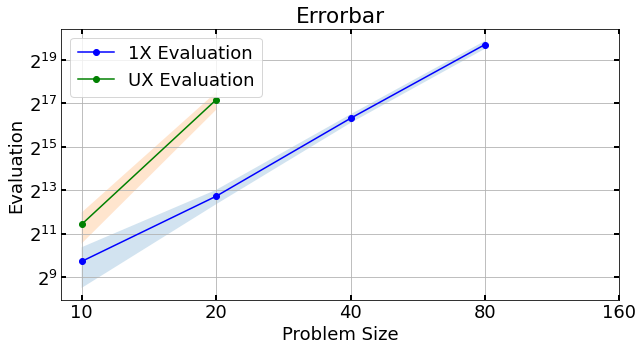

In [199]:
fig = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = 18

ax = plt.subplot(111)
ax.plot(y[0:len(x1)] , x1, "bo-", label = '1X Evaluation')
#ax.plot(y, x1, marker="o", label = '1X MRPS')
ax.fill_between(y[0:len(x1)], x1 + x1_err, x1 - x1_err, alpha=0.2)
ax.plot(y[0:len(x2)] , x2, "go-", label = 'UX Evaluation')
#ax.plot(y, x2, marker="o", label = 'UX MRPS')
ax.fill_between(y[0:len(x2)], x2 + x2_err, x2 - x2_err, alpha=0.2)




#ax.set_yscale('log', basey=2)
#ax.set_xlim(0, 170)
#ax.set_ylim(0, 2200)

ax.set_xscale('log', basex = 2)
ax.set_xticks([10, 20, 40, 80, 160])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_yscale('log', basey=2)
ax.minorticks_on() 
ax.tick_params(axis="both", which="major",direction="in",length=5,width=2,top="on",right="on")
ax.tick_params(axis="both", which="minor",direction="in",length=2,width=1,top="on",right="on")

ax.set_title("Errorbar")
ax.set_xlabel("Problem Size")
ax.set_ylabel("Evaluation")

ax.grid()
plt.legend(loc = 'best')
plt.show()


fig.savefig("Trap5_Compare_Evaluation_UX_1X.pdf",format="pdf", dpi=300)

